<a href="https://colab.research.google.com/github/Xicotrainer/venv/blob/master/StudyCase.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PET SHOP

## Libraries and data loading

In [ ]:
import pandas as pd

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
dataset = pd.read_csv("/content/pet_sales.csv")

In [ ]:
dataset.head(3)

,product_id,product_category,sales,price,vendor_id,pet_size,pet_type,rating,re_buy
0,5040,Equipment,"$123,000",94.81,VC_1605,small,fish,7,1
1,4567,Toys,"$61,000",120.95,VC_1132,small,cat,10,0
2,4237,Toys,"$218,000",106.34,VC_802,small,hamster,6,0


## EDA

### Firts data scouting

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 879 entries, 0 to 878
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   product_id        879 non-null    int64  
 1   product_category  879 non-null    object 
 2   sales             879 non-null    object 
 3   price             879 non-null    float64
 4   vendor_id         879 non-null    object 
 5   pet_size          879 non-null    object 
 6   pet_type          879 non-null    object 
 7   rating            879 non-null    int64  
 8   re_buy            879 non-null    int64  
dtypes: float64(1), int64(3), object(5)
memory usage: 61.9+ KB


In [ ]:
# miss values
dataset.isnull().sum()

product_id          0
product_category    0
sales               0
price               0
vendor_id           0
pet_size            0
pet_type            0
rating              0
re_buy              0
dtype: int64

In [ ]:
# Repeated data points
dataset.duplicated().sum()

0

In [ ]:
dataset["sales"] = dataset["sales"].apply(lambda sales: float(sales.replace("$","").replace(",","")))

In [ ]:
dataset.describe()

,product_id,sales,price,rating,re_buy
count,879.00000,879.000000,879.000000,879.000000,879.000000
mean,4611.00000,116094.425484,128.212253,6.500569,0.466439
std,253.88974,66297.297233,71.923583,2.852835,0.499156
min,4172.00000,3000.000000,0.350000,1.000000,0.000000
25%,4391.50000,60500.000000,65.210000,5.000000,0.000000
50%,4611.00000,116000.000000,129.520000,6.000000,0.000000
75%,4830.50000,177000.000000,188.220000,10.000000,1.000000
max,5050.00000,230000.000000,252.690000,10.000000,1.000000


There are no missed or ducplicated values, there is a short dataset with 879 rows.

### Categorical data

In [ ]:
dataset.dtypes == "object"

product_id          False
product_category     True
sales               False
price               False
vendor_id            True
pet_size             True
pet_type             True
rating              False
re_buy              False
dtype: bool

In [ ]:
mask = (dataset.dtypes == "object")
features = [key for key in dict(mask) if mask[key]]

In [ ]:
features

['product_category', 'vendor_id', 'pet_size', 'pet_type']

In [ ]:
for num, item in enumerate(features):
    print("This is the feature's name {} with the index {}".format(item, num))

This is the feature's name product_category with the index 0
This is the feature's name vendor_id with the index 1
This is the feature's name pet_size with the index 2
This is the feature's name pet_type with the index 3


In [ ]:
plt.subplot(4, 1, 1)

In [ ]:
tmp = 0
for item, num in enumerate(features):
    plt.subplot(2, 2, num + 1)
    tmp = dataset.groupby(categorical)["item"].count()
    sns.barplot(x=tmp.values, y=tmp.index)

TypeError: ignored

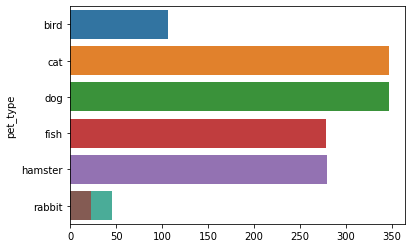

In [ ]:


tmp = 0
for categorical in features:
    tmp = dataset.groupby(categorical)["product_id"].count()
    sns.barplot(x=tmp.values, y=tmp.index)

In [ ]:
# petsize frequency labels
dataset.groupby("pet_size").count()["product_id"]

pet_size
extra_large    106
extra_small    107
large          107
medium         279
small          280
Name: product_id, dtype: int64

In [ ]:
pet_size_freq = dataset.groupby("pet_size").count()["product_id"]

In [ ]:
type(pet_size_freq)

pandas.core.series.Series

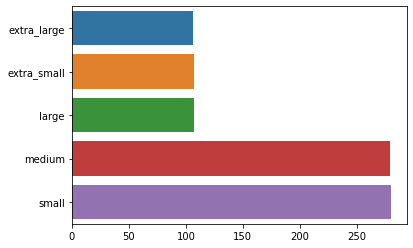

In [ ]:
sns.barplot(x = pet_size_freq.values, y=list(pet_size_freq.index))

In [ ]:
dataset.groupby("pet_type")["product_id"].count()

pet_type
bird        69
cat        347
dog        347
fish        70
hamster     23
rabbit      23
Name: product_id, dtype: int64

In [ ]:
pet_type_freq = dataset.groupby("pet_type")["product_id"].count()

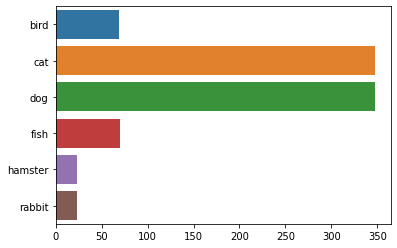

In [ ]:
sns.barplot(x = pet_type_freq.values, y = list(pet_type_freq.index))